#  La **classification** avec Scikit Learn
   - Lecture de jeux de données avec scikit learn
   - Création de différents modèles de classification
   - Paramétrage des modèles


## Popular algorithms in classification

- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

# The problematic:

    Every task has a story. So, here you have to analysis why customers are leaving bank? what is the reason behind it?

Download dataset:
https://www.kaggle.com/sanjanavoona1043/bank-churn

Recuperer le chemin ou sont ranges les fichiers jupyter

Linux: 

    - !pwd

Windows:

    - !echo %cd%
    - !dir

# Setup

Let's relax display limits and print all the columns:

In [200]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [201]:
df = pd.read_csv("../data/Bank_churn_modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [202]:
df.shape

(10000, 14)

In [203]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [204]:
# my_columns = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
#        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
#        'IsActiveMember', 'EstimatedSalary', 'Exited']
# all_columns = df.columns

# Create features and target

In [205]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [206]:
# DF   COL_0   COL_1   COL_2   COL_3 -> axis=1 
# ID_0
# ID_1
# ID_2
# ID_3
# ID_4
# |
# V 
# axis = 0


In [207]:
df_with_2_columns_less = df.drop(['Gender', 'Exited'], axis=1)
df_with_2_columns_less
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [208]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [209]:
df[df.columns[2:5]]
# nb = 3
# for i in range(nb):
#     print(i)

,Surname,CreditScore,Geography
0,Hargrave,619,France
1,Hill,608,Spain
2,Onio,502,France
3,Boni,699,France
4,Mitchell,850,Spain
...,...,...,...
9995,Obijiaku,771,France
9996,Johnstone,516,France
9997,Liu,709,France
9998,Sabbatini,772,Germany


In [210]:
import numpy as np

target_name = df.columns[-1]
print(target_name)

df_clean = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender'], axis=1)

X = df_clean.drop(target_name, axis=1)
y = df_clean[target_name]

Exited


In [211]:
X.head()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,42,2,0.00,1,1,1,101348.88
1,15647311,608,41,1,83807.86,1,0,1,112542.58
2,15619304,502,42,8,159660.80,3,1,0,113931.57
3,15701354,699,39,1,0.00,2,0,0,93826.63
4,15737888,850,43,2,125510.82,1,1,1,79084.10


In [212]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Let’s also split our data for training and testing:

In [213]:
# X = 
# DF      FEAT_0   FEAT_1   FEAT_2   FEAT_3
# EX_0        42       12        9      2.4
# EX_1
# EX_2
# EX_3

# EX_4        41       10        4      6.4


# X_Train: Il sert a l'entrainement du model
# [EX_0 : EX_3]

# X_Test: Il sert a la validation,
#         c'est ce que l'on donne a model.predict()
# [EX_4]



#y =
# T_0 0
# T_0 1
# T_0 1
# T_0 0

# T_0 0

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# X_train

In [215]:
# np.concatenate((X_train, y_train, ...), axis=0)

Despite it's name, logistic regression is mainly used for classification

**Logistic** is the import term -> will output a probability

<Axes: xlabel='Exited', ylabel='Count'>

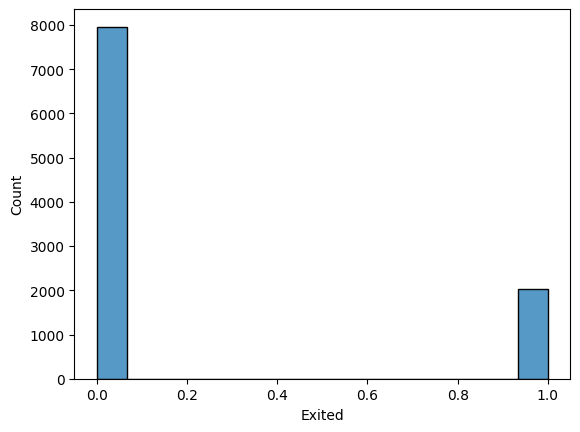

In [216]:
import seaborn as sns

sns.histplot(df['Exited'])

<Axes: xlabel='Exited', ylabel='Count'>

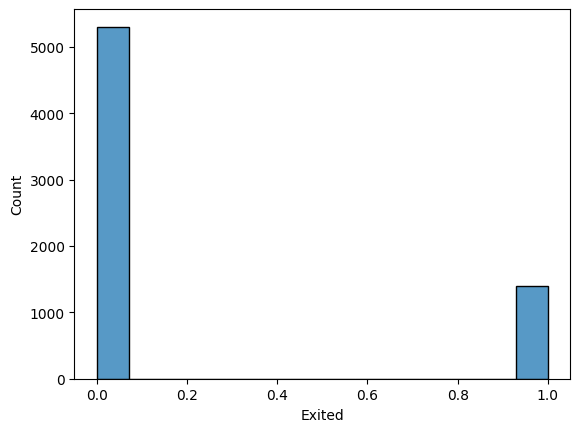

In [217]:
sns.histplot(y_train)

In [218]:
# sns.pairplot(df, hue="Exited")

# Logistic Regression

Despite it's name, logistic regression is mainly used for classification

**Logistic** is the import term -> will output a probability

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
model_logr = LogisticRegression()
model_logr.fit(X_train, y_train)
y_pred = model_logr.predict(X_test)

/home/ezalos/42/Notebooks2Teach/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Nice print

Credit to: https://www.kaggle.com/agungor2/various-confusion-matrix-plots?scriptVersionId=12813038&cellId=4

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def plot_cm(y_true, y_pred, figsize=(10, 10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    print(cm)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap="YlGnBu", annot=annot, fmt='', ax=ax)
    plt.show()

## Visualize results

## First logistic regression

[[2645   12]
 [ 633   10]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


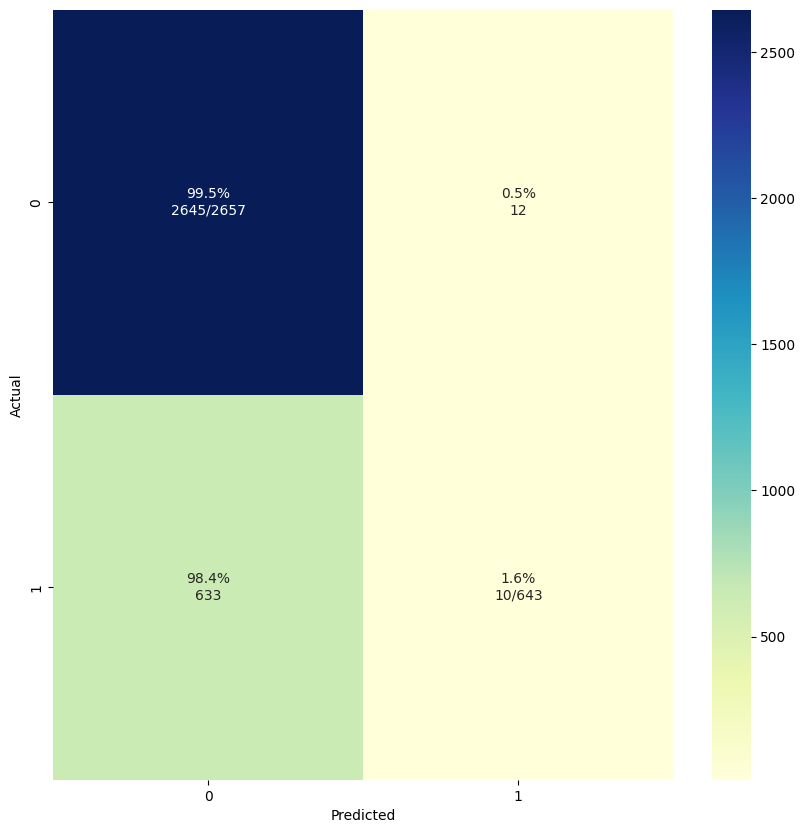

In [222]:
from sklearn.metrics import confusion_matrix

plot_cm(y_test, y_pred)

In [223]:
#                     Predicted

#                 0 False N| 1 True P
#        N 0 False TrueNeg | FalsePos 
# Actual __________________|_________
#        P 1 True FalseNeg | TruePos

# ![Cov Mat](https://miro.medium.com/max/872/0*dh9DQi6-yMo3VGBT.png)

![Cov Mat](https://miro.medium.com/max/872/0*dh9DQi6-yMo3VGBT.png)

What do you think of this result ?

## Solving imbalance

In [224]:
from collections import Counter

Counter(df_clean['Exited'])

Counter({0: 7963, 1: 2037})

Data has imbalance in labels

One way to remedy this is to balance the training data.

    Instead of using ‘train_test_split’ we can sample using the Pandas sample method on our original dataframe to generate training and test sets

In [231]:
df_train = df_clean.sample(int(0.67*len(df_clean)), random_state=42)

df_test = df_clean[~df_clean['CustomerId'].isin(list(df_train['CustomerId']))]

We can now balance the training data while leaving the distribution in labels in the test set untouched:

In [232]:
df_train['Exited'] == 0 

6252     True
4684     True
1731     True
4742     True
4521     True
        ...  
6948    False
4857     True
3180    False
1439     True
7269    False
Name: Exited, Length: 6700, dtype: bool

In [233]:
# Sample in is the minimum number between [['Exited'] == 0, ['Exited'] == 1]
sample_in = int(min(list(dict(Counter(df_train['Exited'])).values()))-1)
print(sample_in)

1354


In [234]:
df_1 = df_train[df_train["Exited"] == 0]
df_2 = df_train[df_train["Exited"] == 1]
print(f"{df_1.shape = }")
print(f"{df_2.shape = }")
df_1 = df_1.sample(n=sample_in, random_state=42)
df_2 = df_2.sample(n=sample_in, random_state=24)
print(f"{df_1.shape = }")
print(f"{df_2.shape = }")
df_train = pd.concat([df_1, df_2], axis=0)

Counter(df_train["Exited"])

df_1.shape = (5345, 10)
df_2.shape = (1355, 10)
df_1.shape = (1354, 10)
df_2.shape = (1354, 10)


Counter({0: 1354, 1: 1354})

In [235]:
df_train.shape

(2708, 10)

In [236]:
target_name

'Exited'

In [237]:
X = df_train.drop(target_name, axis=1)
y = df_train[target_name]


In [238]:
X_train = df_train.drop(target_name, axis=1)
X_test = df_test.drop(target_name, axis=1)
y_train = df_train[target_name]
y_test = df_test[target_name]


In [252]:
"TRAIN:", X_train.shape, y_train.shape, "TEST:", X_test.shape, y_test.shape

('TRAIN:', (2708, 9), (2708,), 'TEST:', (3300, 9), (3300,))

## Second logisitic Regression

Now if we train our model and predict on the test set we get:

[[1872  746]
 [ 222  460]]


/home/ezalos/42/Notebooks2Teach/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


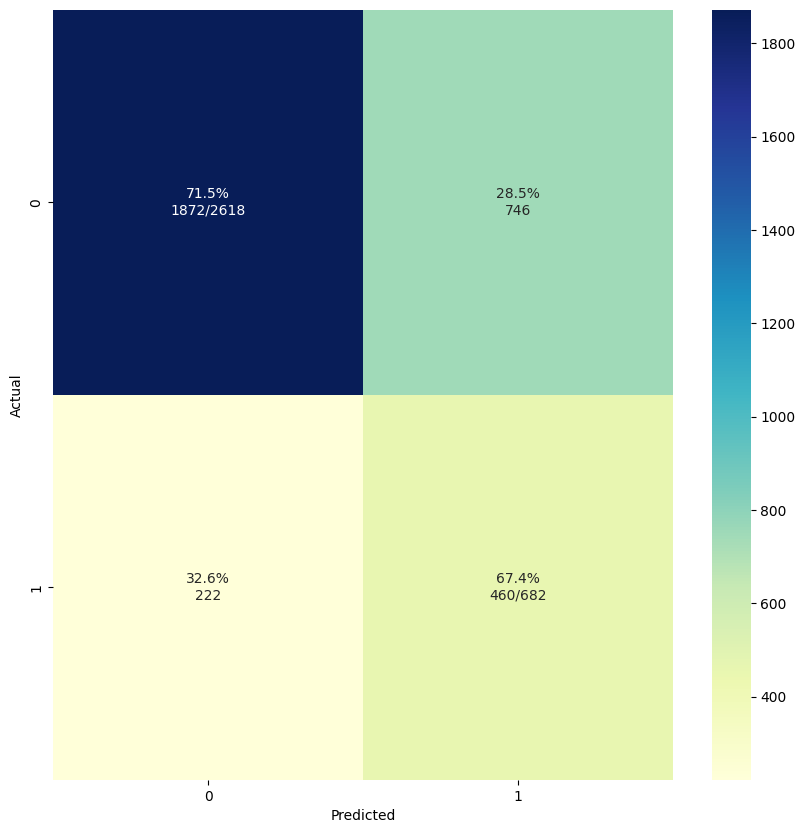

In [240]:
model_logr = LogisticRegression()
model_logr.fit(X_train, y_train)
y_pred = model_logr.predict(df_test.drop(target_name, axis=1))

plot_cm(y_test, y_pred)

# Hyper Parameters Optimizations

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def train_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    conmat = confusion_matrix(y_test, y_pred)
    conmat = np.mat(conmat)
    plot_cm(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"f1 score is {f1}")
    return y_pred, conmat


## Optimize Logistic Regression

[[329 120]
 [152 293]]


/home/ezalos/42/Notebooks2Teach/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


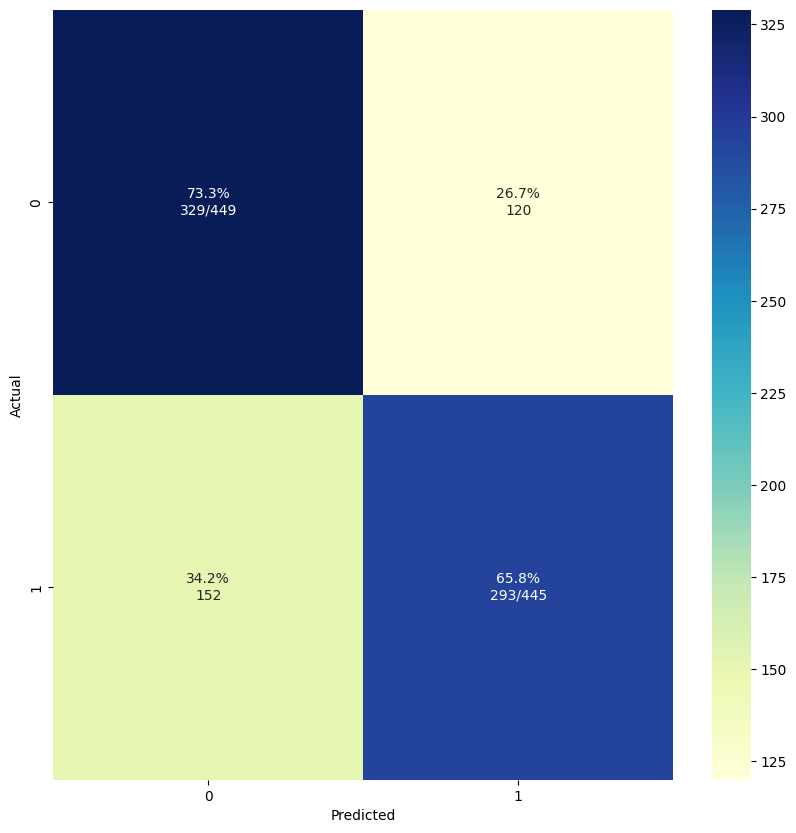

f1 score is 0.682983682983683


In [242]:
from sklearn.linear_model import LogisticRegression

y_pred, conmat = train_model(LogisticRegression(), X, y)


<!-- 1e3

1 * (10^3) -->

In [243]:
# sigmoid((Theta0 * f_0) + (Theta1 * f_1) + (Theta2 * f_2 ))
# Theta0 + Theta1 + Theta2

In [244]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

def get_regression_logistic_parameters():
    penalty = ['l2', 'none']
    tol = [1e-4, 1e-3, 1e-5]
    C = [0.1, 1.0, 10.0, 100.0]
    dual = [True, False]
    
    random_grid = {'penalty':penalty,
                   'tol': tol,
                   'C': C,
                   'dual': dual}

    model = LogisticRegression()
    rf_random = RandomizedSearchCV(estimator = model,
                                   param_distributions = random_grid,
                                   n_iter = 5,
                                   cv = 3,
                                   verbose = 2,
                                   random_state = 42)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    return parameters

better_params = get_regression_logistic_parameters()
better_params

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ........C=10.0, dual=True, penalty=none, tol=0.0001; total time=   0.0s
[CV] END ........C=10.0, dual=True, penalty=none, tol=0.0001; total time=   0.0s
[CV] END ........C=10.0, dual=True, penalty=none, tol=0.0001; total time=   0.0s
[CV] END ........C=100.0, dual=True, penalty=none, tol=0.001; total time=   0.0s
[CV] END ........C=100.0, dual=True, penalty=none, tol=0.001; total time=   0.0s
[CV] END ........C=100.0, dual=True, penalty=none, tol=0.001; total time=   0.0s
[CV] END ...........C=10.0, dual=True, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END ...........C=10.0, dual=True, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END ...........C=10.0, dual=True, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END .........C=100.0, dual=False, penalty=l2, tol=0.001; total time=   0.0s
[CV] END .........C=100.0, dual=False, penalty=l2, tol=0.001; total time=   0.0s
[CV] END .........C=100.0, dual=False, penalty=l2

/home/ezalos/42/Notebooks2Teach/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ezalos/42/Notebooks2Teach/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

{'tol': 0.001, 'penalty': 'l2', 'dual': False, 'C': 100.0}

Let's build a function to compare RandomForest and SVM

## Optimize RandomForestClassifier

[[348 101]
 [133 312]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


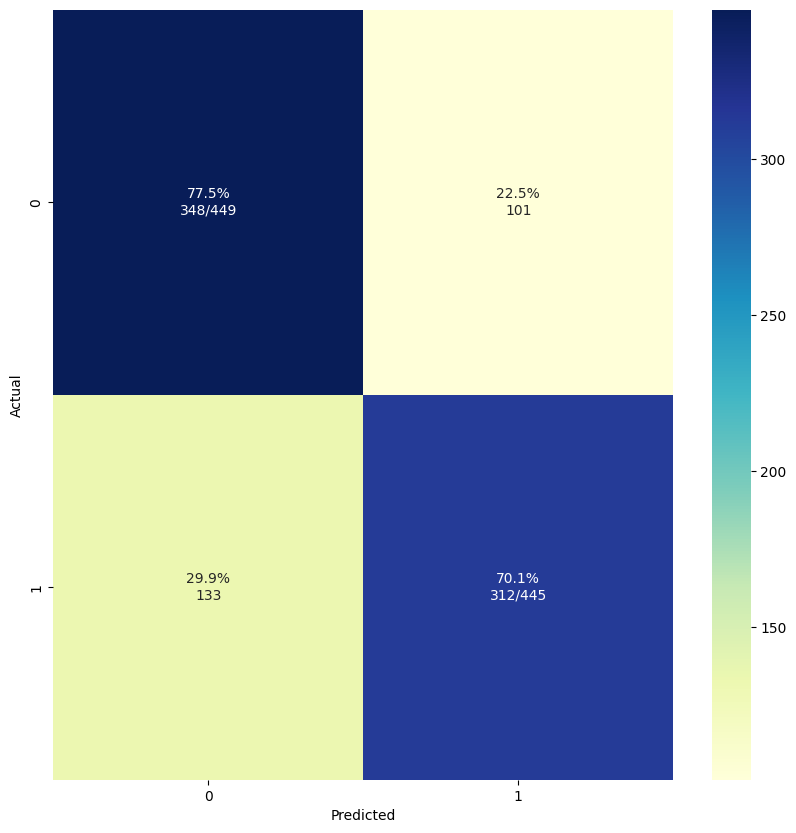

f1 score is 0.7272727272727273


In [245]:
from sklearn.ensemble import RandomForestClassifier

y_pred, conmat = train_model(RandomForestClassifier(random_state=42), X, y)

In [246]:
# model(param[0][random()],
#       param[1][random()],
#       param[2][random()],
#       param[3][random()],)
# score(model)

In [247]:
from sklearn.model_selection import RandomizedSearchCV

def get_rf_parameters():
    n_estimators = [80, 90, 100, 110]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 50, None]
    min_samples_split = [2, 4, 6, 8]
    min_samples_leaf = [1, 2, 4, 6]
    bootstrap = [True, False]
    
    random_grid = {'n_estimators':n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap':bootstrap}
    model = RandomForestClassifier(random_state =42)
    rf_random = RandomizedSearchCV(estimator = model,
                                   param_distributions = random_grid,
                                   n_iter = 5,
                                   cv = 3,
                                   verbose =  2,
                                   random_state = 42)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    return parameters

better_params = get_rf_parameters()
better_params

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=80; tot

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5,
 'bootstrap': False}

[[348 101]
 [133 312]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


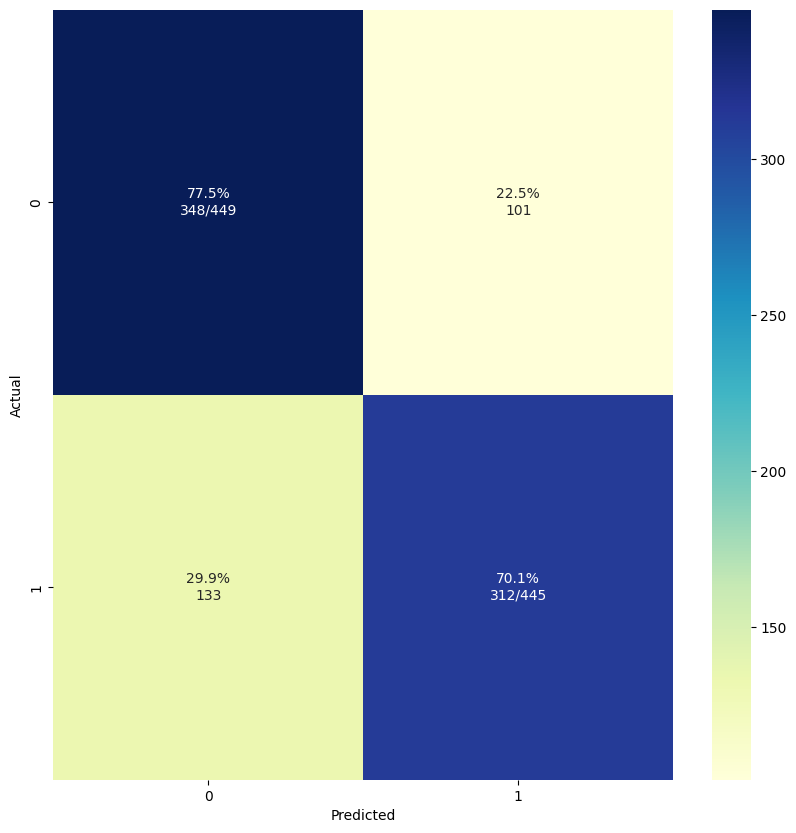

f1 score is 0.7272727272727273
[[360  89]
 [133 312]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


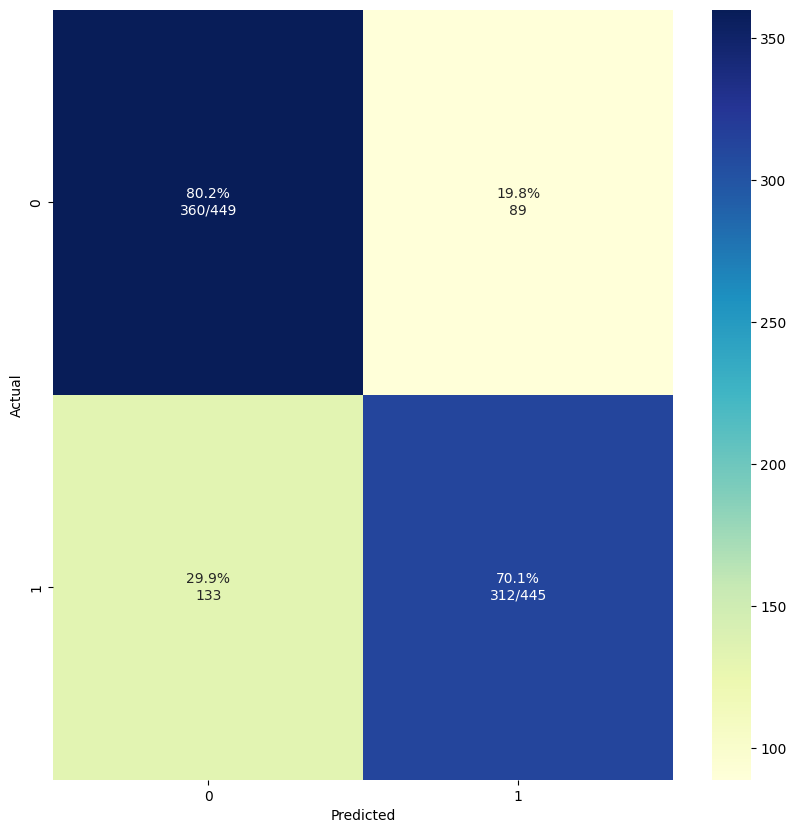

f1 score is 0.7375886524822695


In [248]:
y_pred, conmat = train_model(RandomForestClassifier(random_state=42), X, y)
y_pred, conmat = train_model(RandomForestClassifier(**better_params, random_state=42), X, y)


In [249]:
def get_svm_parameters():
    C = [0.1, 1, 10,]
    gamma = [1, 0.1, 0.01]
    kernel = ['rbf', 'linear']
    
    random_grid = {'C': C,'gamma': gamma, 'kernel':kernel}  
    model = SVC(random_state =42)
    svm_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                             n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    svm_random.fit(X_train, y_train)
    parameters = svm_random.best_params_
    
    return parameters
    
svm_par = get_svm_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=0.01, ke

[[  0 449]
 [  0 445]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


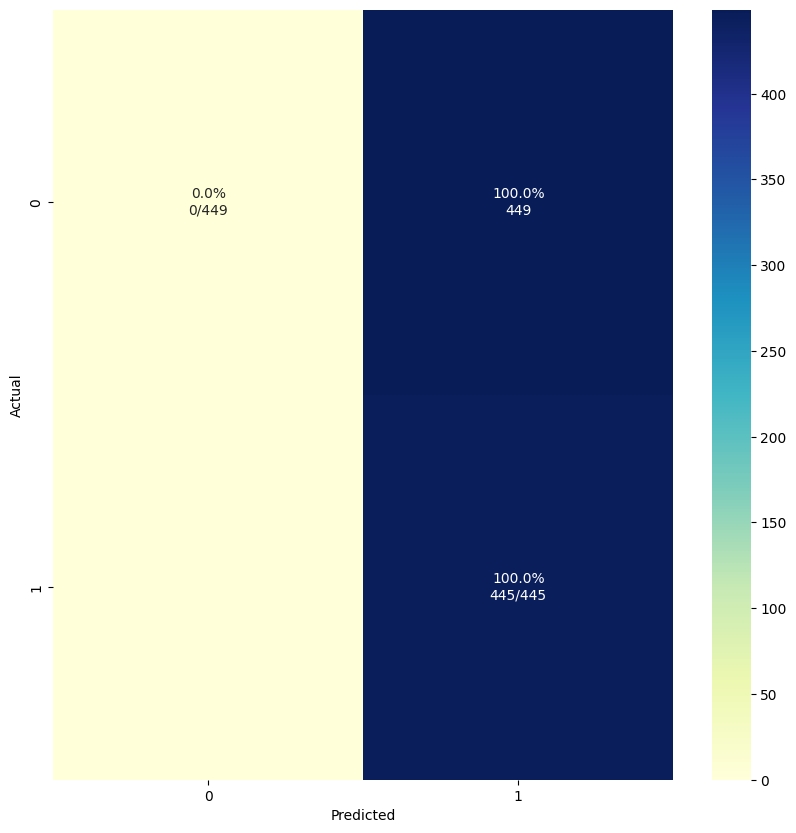

f1 score is 0.6646751306945482
[[200 249]
 [134 311]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


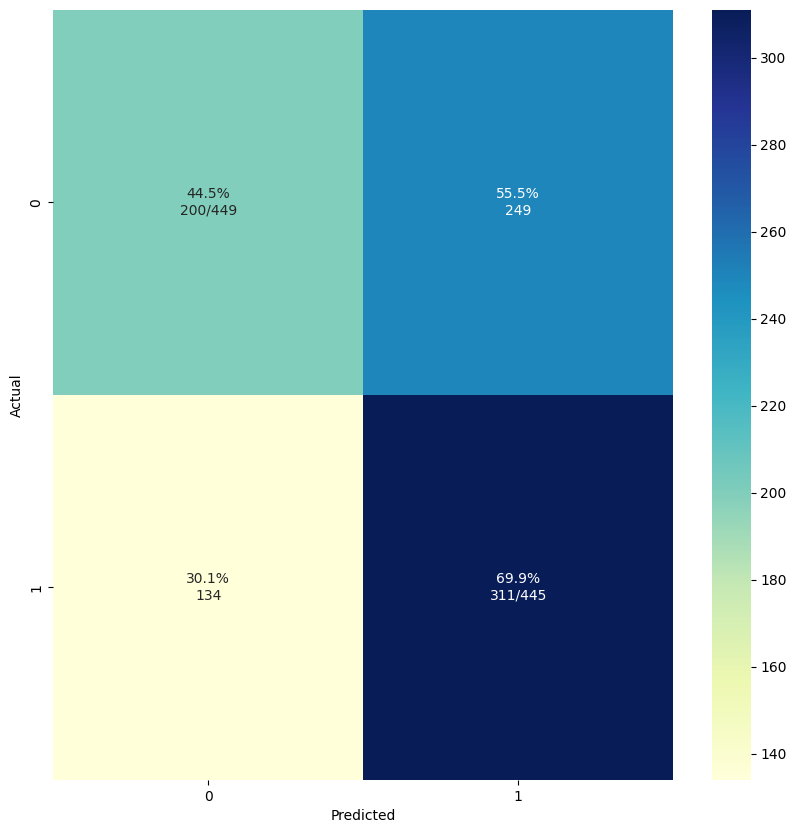

f1 score is 0.618905472636816


In [250]:
y_pred, conmat = train_model(SVC(), X, y)
y_pred, conmat = train_model(SVC(**svm_par), X, y)

[[861   0]
 [228   0]]


/tmp/ipykernel_7944/2224080452.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


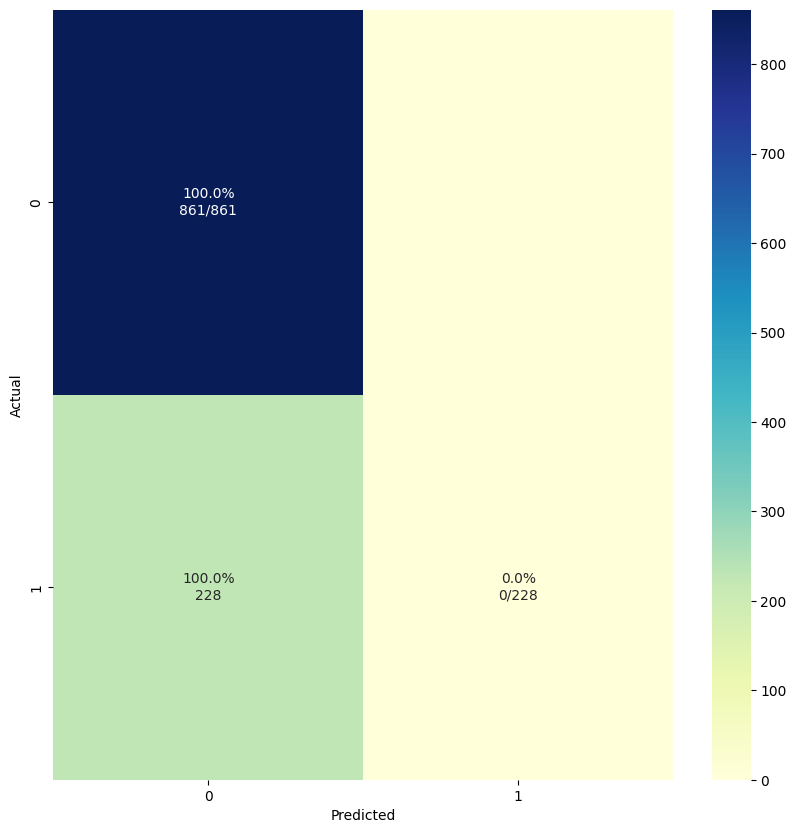

f1 score is 0.0


In [251]:
y_pred, conmat = train_model(SVC(**svm_par), X_test, y_test)